In [269]:
import numpy as np

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """Initializes the neural network with random weights."""
        self.weights1 = np.random.randn(input_size, hidden_size)  # Weights between input and hidden layer
        self.bias1 = np.random.randn(1, hidden_size)       # Biases for the hidden layer
        self.weights2 = np.random.randn(hidden_size, output_size) # Weights between hidden and output layer
        self.bias2 = np.random.randn(1, output_size)      # Biases for the output layer

    def forward(self, X):
        """Performs forward propagation."""
        self.hidden_layer_output = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden_layer_output, self.weights2) + self.bias2)
        return self.output

    def backward(self, X, y, learning_rate):
        """Performs backpropagation and updates weights."""

        # Output layer
        error_output = y - self.output
        delta_output = error_output * sigmoid_derivative(self.output)
        
        # Hidden layer
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights2 += self.hidden_layer_output.T.dot(delta_output) * learning_rate
        self.bias2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(delta_hidden) * learning_rate
        self.bias1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate



    def train(self, X, y, epochs=10000, learning_rate=0.1):
        """Trains the neural network."""
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:  # Print loss every 1000 epochs (optional)
                loss = np.mean(np.square(y - output)) # Example loss function (MSE)
                print(f"Epoch: {epoch}, Loss: {loss}")

    def predict(self, X):
        """Makes predictions."""
        return self.forward(X)


# Example usage (XOR problem):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [1], [1], [0]])  # Target output

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1) # 2 inputs, 4 hidden nodes, 1 output
nn.train(X, y, epochs=50000, learning_rate=0.5) # Train the model

# Make predictions:
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

Epoch: 0, Loss: 0.25021142338544655
Epoch: 1000, Loss: 0.005402412220044528
Epoch: 2000, Loss: 0.0018887338702984376
Epoch: 3000, Loss: 0.0011047734946855738
Epoch: 4000, Loss: 0.0007712445192718557
Epoch: 5000, Loss: 0.0005888514888261304
Epoch: 6000, Loss: 0.0004745582561519108
Epoch: 7000, Loss: 0.0003965162250563846
Epoch: 8000, Loss: 0.00033997735949601373
Epoch: 9000, Loss: 0.00029720384265399455
Epoch: 10000, Loss: 0.0002637562985685239
Epoch: 11000, Loss: 0.00023691034963321258
Epoch: 12000, Loss: 0.00021490373704381174
Epoch: 13000, Loss: 0.00019654728113833103
Epoch: 14000, Loss: 0.00018101012031186987
Epoch: 15000, Loss: 0.00016769460182468348
Epoch: 16000, Loss: 0.00015616006499328207
Epoch: 17000, Loss: 0.00014607462087768688
Epoch: 18000, Loss: 0.00013718364041651073
Epoch: 19000, Loss: 0.00012928857534488206
Epoch: 20000, Loss: 0.00012223236977219383
Epoch: 21000, Loss: 0.00011588919120944194
Epoch: 22000, Loss: 0.00011015706134608055
Epoch: 23000, Loss: 0.00010495247563

In [3]:
a = np.array([[0, 0, 0],
       [0, 1, 0],
       [0, 2, 0],
       [1, 0, 0],
       [1, 1, 0]])

np.sum(a, axis=0, keepdims=True)


array([[2, 4, 0]])

In [299]:
# mathematically correct backprop  - numerically unstable
import numpy as np

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_stable(x):
    "Numerically stable sigmoid function."
    if x.any() >= 0:
        z = np.exp(-x + 1e-3)
        return 1 / (1 + z)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = np.exp(x)
        return z / (1 + z)

def exp_normalize(x):  # use exp-normalize trick
    b = np.max(x)
    y = np.exp(x - b)
    return y / y.sum()

def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    xs = sigmoid(x)
    return xs * (1 - xs)

def sigmoid_d_sigin(x):
    """Derivative of the sigmoid function - x has to be sigmoid already"""
    return x * (1 - x)

def relu(x):
    """ReLU activation function."""
    return x * (x > 0)

def relu_derivative(x):
    """Derivative of the ReLU function."""
    return 1. * (x > 0)
    
    
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """Initializes the neural network with random weights."""
        self.weights1 = np.random.randn(input_size, hidden_size)  # Weights between input and hidden layer
        self.bias1 = np.random.randn(1, hidden_size)       # Biases for the hidden layer
        self.weights2 = np.random.randn(hidden_size, output_size) # Weights between hidden and output layer
        self.bias2 = np.random.randn(1, output_size)      # Biases for the output layer

    def forward(self, X):
        """Performs forward propagation."""
        self.hidden_layer_output = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden_layer_output, self.weights2) + self.bias2)
        return self.output

    def backward(self, X, y, learning_rate):
        """Performs backpropagation and updates weights."""
        #print(self.weights1, self.weights2)
        # Output layer
        error_output = y - self.output
        delta_output = error_output * sigmoid_d_sigin(self.output)  # careful: need to use x * (1-x) here as sig_deriv as we pass the output (sig)
        #delta_output_full = error_output * sigmoid_derivative(np.dot(self.hidden_layer_output, self.weights2))  # instability is here
        #delta_output_full = error_output * relu_derivative(self.output)  # this still keeps the bias in even as the deriv with respect to w2 would lose it
        
        # Hidden layer
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * sigmoid_d_sigin(self.hidden_layer_output)
        #delta_hidden_full = delta_output_full.dot(self.weights2.T) * sigmoid_derivative(np.dot(X, self.weights1) + self.bias1)  # bias-term stabilizes here
        
        # Update weights and biases
        self.weights2 += self.hidden_layer_output.T.dot(delta_output) * learning_rate
        #self.weights2 += self.hidden_layer_output.T.dot(delta_output_full) * learning_rate
        self.bias2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        #self.bias2 += np.sum(error_output, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(delta_hidden) * learning_rate
        #self.weights1 += (np.dot(self.weights2.T, delta_hidden_full).T * X).T * learning_rate  # the problem is here
        self.bias1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate
        #self.bias1 += np.sum(np.dot(delta_hidden_full.T, self.weights2), axis=0, keepdims=True) * learning_rate
        #self.bias1 += np.sum(delta_hidden_full, axis=0, keepdims=True) * learning_rate


    def train(self, X, y, epochs=10000, learning_rate=0.1, output_every=1000):
        """Trains the neural network."""
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % output_every == 0:  # Print loss every 1000 epochs (optional)
                loss = np.mean(np.square(y - output)) # Example loss function (MSE)
                print(f"Epoch: {epoch}, Loss: {loss}")
                # optional pruning
                #self.weights1[abs(self.weights1) < 1e-2] = 0
                #self.weights2[abs(self.weights2) < 1e-2] = 0

    
    def predict(self, X):
        """Makes predictions."""
        return self.forward(X)


# Example usage (XOR problem):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [1], [1], [0]])  # Target output
# input variable standardization omitted  [xi - min(x)] / [max(x) - min(x)]

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)  # 2 inputs, 4 hidden nodes, 1 output
nn.train(X, y, epochs=50000, learning_rate=0.5, output_every=2000)  # Train the model

# Make predictions:
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

Epoch: 0, Loss: 0.25197498248415096
Epoch: 2000, Loss: 0.0020451762524309127
Epoch: 4000, Loss: 0.0007178594998462216
Epoch: 6000, Loss: 0.000419011496692839
Epoch: 8000, Loss: 0.00029131202452414254
Epoch: 10000, Loss: 0.00022137813534038093
Epoch: 12000, Loss: 0.0001775598364971579
Epoch: 14000, Loss: 0.0001476687526316816
Epoch: 16000, Loss: 0.0001260458523787279
Epoch: 18000, Loss: 0.00010971688813369982
Epoch: 20000, Loss: 9.697362009387609e-05
Epoch: 22000, Loss: 8.676709430930543e-05
Epoch: 24000, Loss: 7.84186283954392e-05
Epoch: 26000, Loss: 7.147025568697961e-05
Epoch: 28000, Loss: 6.560207743886969e-05
Epoch: 30000, Loss: 6.0584077865832056e-05
Epoch: 32000, Loss: 5.624675289432194e-05
Epoch: 34000, Loss: 5.24625205257304e-05
Epoch: 36000, Loss: 4.913356968327758e-05
Epoch: 38000, Loss: 4.618369256586239e-05
Epoch: 40000, Loss: 4.355265868396584e-05
Epoch: 42000, Loss: 4.119225505351232e-05
Epoch: 44000, Loss: 3.906344505898866e-05
Epoch: 46000, Loss: 3.71342945918336e-05
Ep

In [288]:
# https://pyimagesearch.com/2021/05/06/backpropagation-from-scratch-with-python/
# import the necessary packages
import numpy as np


class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))

    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that x has already been passed through the 'sigmoid'
        # function
        return x * (1 - x)

    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO] epoch={}, loss={:.7f}".format(
                    epoch + 1, loss))

    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            # once we have the net output, add it to our list of
            # activations
            A.append(out)
        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        error = A[-1] - y
        # from here, we need to apply the chain rule and build our
        # list of deltas 'D'; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]
        # once you understand the chain rule it becomes super easy
        # to implement with a 'for' loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes
            # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value 'p'
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation
            # function
            p = self.sigmoid(np.dot(p, self.W[layer]))
        # return the predicted value
        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        # return the loss
        return loss

        







In [290]:
#from pyimagesearch.nn import NeuralNetwork

nn = NeuralNetwork([2, 2, 1])
print(nn)


NeuralNetwork: 2-2-1


In [293]:
# import the necessary packages
#from pyimagesearch.nn import NeuralNetwork
import numpy as np

# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=20000, displayUpdate=500)
# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
	# make a prediction on the data point and display the result
	# to our console
	pred = nn.predict(x)[0][0]
	step = 1 if pred > 0.5 else 0
    
	print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
		x, target[0], pred, step))




[INFO] epoch=1, loss=0.5052719
[INFO] epoch=500, loss=0.4899362
[INFO] epoch=1000, loss=0.2722973
[INFO] epoch=1500, loss=0.1639889
[INFO] epoch=2000, loss=0.1404335
[INFO] epoch=2500, loss=0.1338330
[INFO] epoch=3000, loss=0.1310129
[INFO] epoch=3500, loss=0.1294984
[INFO] epoch=4000, loss=0.1285673
[INFO] epoch=4500, loss=0.1279422
[INFO] epoch=5000, loss=0.1274958
[INFO] epoch=5500, loss=0.1271622
[INFO] epoch=6000, loss=0.1269040
[INFO] epoch=6500, loss=0.1266986
[INFO] epoch=7000, loss=0.1265315
[INFO] epoch=7500, loss=0.1263932
[INFO] epoch=8000, loss=0.1262767
[INFO] epoch=8500, loss=0.1261775
[INFO] epoch=9000, loss=0.1260919
[INFO] epoch=9500, loss=0.1260174
[INFO] epoch=10000, loss=0.1259519
[INFO] epoch=10500, loss=0.1258940
[INFO] epoch=11000, loss=0.1258424
[INFO] epoch=11500, loss=0.1257961
[INFO] epoch=12000, loss=0.1257544
[INFO] epoch=12500, loss=0.1257166
[INFO] epoch=13000, loss=0.1256822
[INFO] epoch=13500, loss=0.1256508
[INFO] epoch=14000, loss=0.1256220
[INFO] ep

In [295]:
# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=20000, displayUpdate=500)






[INFO] epoch=1, loss=0.5880017
[INFO] epoch=500, loss=0.1150901
[INFO] epoch=1000, loss=0.0139236
[INFO] epoch=1500, loss=0.0063214
[INFO] epoch=2000, loss=0.0039370
[INFO] epoch=2500, loss=0.0028123
[INFO] epoch=3000, loss=0.0021682
[INFO] epoch=3500, loss=0.0017545
[INFO] epoch=4000, loss=0.0014680
[INFO] epoch=4500, loss=0.0012587
[INFO] epoch=5000, loss=0.0010995
[INFO] epoch=5500, loss=0.0009746
[INFO] epoch=6000, loss=0.0008742
[INFO] epoch=6500, loss=0.0007918
[INFO] epoch=7000, loss=0.0007230
[INFO] epoch=7500, loss=0.0006648
[INFO] epoch=8000, loss=0.0006150
[INFO] epoch=8500, loss=0.0005718
[INFO] epoch=9000, loss=0.0005341
[INFO] epoch=9500, loss=0.0005009
[INFO] epoch=10000, loss=0.0004714
[INFO] epoch=10500, loss=0.0004451
[INFO] epoch=11000, loss=0.0004215
[INFO] epoch=11500, loss=0.0004001
[INFO] epoch=12000, loss=0.0003808
[INFO] epoch=12500, loss=0.0003632
[INFO] epoch=13000, loss=0.0003470
[INFO] epoch=13500, loss=0.0003322
[INFO] epoch=14000, loss=0.0003186
[INFO] ep

In [296]:
# define our 2-1 neural network and train it
nn = NeuralNetwork([2, 1], alpha=0.5)
nn.fit(X, y, epochs=20000, displayUpdate=500)




[INFO] epoch=1, loss=0.6030635
[INFO] epoch=500, loss=0.5007939
[INFO] epoch=1000, loss=0.5007938
[INFO] epoch=1500, loss=0.5007938
[INFO] epoch=2000, loss=0.5007938
[INFO] epoch=2500, loss=0.5007938
[INFO] epoch=3000, loss=0.5007938
[INFO] epoch=3500, loss=0.5007938
[INFO] epoch=4000, loss=0.5007938
[INFO] epoch=4500, loss=0.5007938
[INFO] epoch=5000, loss=0.5007938
[INFO] epoch=5500, loss=0.5007938
[INFO] epoch=6000, loss=0.5007938
[INFO] epoch=6500, loss=0.5007938
[INFO] epoch=7000, loss=0.5007938
[INFO] epoch=7500, loss=0.5007938
[INFO] epoch=8000, loss=0.5007938
[INFO] epoch=8500, loss=0.5007938
[INFO] epoch=9000, loss=0.5007938
[INFO] epoch=9500, loss=0.5007938
[INFO] epoch=10000, loss=0.5007938
[INFO] epoch=10500, loss=0.5007938
[INFO] epoch=11000, loss=0.5007938
[INFO] epoch=11500, loss=0.5007938
[INFO] epoch=12000, loss=0.5007938
[INFO] epoch=12500, loss=0.5007938
[INFO] epoch=13000, loss=0.5007938
[INFO] epoch=13500, loss=0.5007938
[INFO] epoch=14000, loss=0.5007938
[INFO] ep

In [297]:
# import the necessary packages
#from pyimagesearch.nn import NeuralNetwork
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0],
	data.shape[1]))
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
	digits.target, test_size=0.25)
# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)
# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)
# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))









[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64
[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=605.2862818
[INFO] epoch=100, loss=7.7118261
[INFO] epoch=200, loss=3.0804622
[INFO] epoch=300, loss=2.5305348
[INFO] epoch=400, loss=1.8910584
[INFO] epoch=500, loss=1.7701411
[INFO] epoch=600, loss=1.7087344
[INFO] epoch=700, loss=1.6699285
[INFO] epoch=800, loss=1.6430435
[INFO] epoch=900, loss=1.6233045
[INFO] epoch=1000, loss=1.6082008
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.96      1.00      0.98        46
           2       0.95      0.97      0.96        38
           3       0.97      0.91      0.94        35
           4       0.91      0.98      0.94        41
           5       0.96      0.98      0.97        47
           6       1.00      0.97      0.98        58
           7       0.98      0.96      0.9

In [ ]:
# https://github.com/rasbt/MachineLearning-QandAI-book?tab=readme-ov-file

In [2]:
from itertools import combinations

list(combinations([1, 2, 3], 2))

[(1, 2), (1, 3), (2, 3)]

In [12]:
import requests

def query_ollama(prompt, model="deepseek-r1"):
    url = "http://localhost:11434/api/generate"
    payload = {
        "model": model,
        "prompt": prompt,
        "stream": False  # Disable streaming for a simple response
    }
    
    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            data = response.json()
            return data.get("response", "No response received")
        else:
            return f"Error: {response.status_code}, {response.text}"
    except Exception as e:
        return f"An error occurred: {e}"
# Example usage
prompt = "What is JavaScript?"
response = query_ollama(prompt)
print(response)

<think>

</think>

JavaScript is a programming language that is:

1. **Dynamic and Interactive**: It's designed for the web, allowing dynamic interactions between content and users.
2. **Scripting Language**: You can write scripts directly in HTML or XHTML, embedding them into web pages.
3. **Cross-Browser Compatible**: JavaScript runs across all modern browsers, making it ideal for web development.
4. **Used Primarily for Web Development**: It's widely used to create websites with rich functionality and user interactions.

JavaScript is known for its versatility and has been a foundational technology in web development for two decades.


In [13]:
import requests

def query_ollama(prompt, model="deepseek-r1"):
    url = "http://localhost:11434/api/generate"
    payload = {
        "model": model,
        "prompt": prompt,
        "stream": False  # Disable streaming for a simple response
    }
    
    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            data = response.json()
            return data.get("response", "No response received")
        else:
            return f"Error: {response.status_code}, {response.text}"
    except Exception as e:
        return f"An error occurred: {e}"
# Example usage
prompt = "Please continue this story: He had noticed the redhead girl walking into the coffeshop. When he looked up from his laptop again she was sitting across from him, here green eyes watching him carefully."
response = query_ollama(prompt)
print(response)

<think>
Okay, so I'm trying to figure out how to help with this user's query about continuing a story. Let me read through it again.

The original prompt is: "He had noticed the redhead girl walking into the coffeshop. When he looked up from his laptop again she was sitting across from him, here green eyes watching him carefully."

Hmm, I notice that in the user message, there's a typo at the end of the second sentence: "here" instead of "he." That might be an error on their part or maybe they just made a mistake. So, I should probably correct that for them.

Looking at the story itself, it's about a man noticing a redhead girl in a coffee shop. He's looking at her from across the table with green eyes watching him. This seems like it's setting up some kind of interaction, maybe a romantic or observational one.

I think my role here is to continue this story. But since I don't have any prior context about who these characters are or where they're going, I'll need to make some assumptio

In [56]:
# iterative NN again

import numpy as np


def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    return x * (1 - x)

# concept for iterative NN:
# start with 2x2 -> 4x4 -> ... . maybe better: find the highest weight cluster, split just that
# split criterion: purity = entropy: split till every subset is pure (ideally)
# split attribute with largest info gain = delta entropy before and after split
# what are the attributes in the weight matrices?
# practivally start out with full-sized matrices but update just subsets and mass-fill the entries


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """Initializes the neural network with random weights."""
        self.weights1 = np.random.randn(input_size, hidden_size)  # Weights between input and hidden layer
        self.bias1 = np.random.randn(1, hidden_size)       # Biases for the hidden layer
        self.weights2 = np.random.randn(hidden_size, output_size) # Weights between hidden and output layer
        self.bias2 = np.random.randn(1, output_size)      # Biases for the output layer

    def forward(self, X):
        """Performs forward propagation."""
        self.hidden_layer_output = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = sigmoid(np.dot(self.hidden_layer_output, self.weights2) + self.bias2)
        return self.output

    def backward(self, X, y, learning_rate):
        """Performs backpropagation and updates weights."""

        # Output layer
        error_output = y - self.output
        delta_output = error_output * sigmoid_derivative(self.output)
        
        # Hidden layer
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights2 += self.hidden_layer_output.T.dot(delta_output) * learning_rate
        self.bias2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(delta_hidden) * learning_rate
        self.bias1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        """Trains the neural network."""
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:  # Print loss every 1000 epochs (optional)
                loss = np.mean(np.square(y - output)) # Example loss function (MSE)
                print(f"Epoch: {epoch}, Loss: {loss}")

    def predict(self, X):
        """Makes predictions."""
        return self.forward(X)



# Example usage (XOR problem):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [1], [1], [0]])  # Target output

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1) # 2 inputs, 4 hidden nodes, 1 output
nn.train(X, y, epochs=50000, learning_rate=0.5) # Train the model

# Make predictions:
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

Epoch: 0, Loss: 0.25968970543743375
Epoch: 1000, Loss: 0.0071397431463400135
Epoch: 2000, Loss: 0.002153086624461504
Epoch: 3000, Loss: 0.0012179915173325634
Epoch: 4000, Loss: 0.0008388567331254501
Epoch: 5000, Loss: 0.0006361098171558601
Epoch: 6000, Loss: 0.0005106661807456903
Epoch: 7000, Loss: 0.00042569732935075576
Epoch: 8000, Loss: 0.00036447594481612915
Epoch: 9000, Loss: 0.000318340021559747
Epoch: 10000, Loss: 0.0002823666345557821
Epoch: 11000, Loss: 0.00025355600816356016
Epoch: 12000, Loss: 0.00022997838550076143
Epoch: 13000, Loss: 0.00021033723809363007
Epoch: 14000, Loss: 0.00019372990455003737
Epoch: 15000, Loss: 0.00017950897639961604
Epoch: 16000, Loss: 0.00016719826733454726
Epoch: 17000, Loss: 0.00015643986742096044
Epoch: 18000, Loss: 0.00014695966369948383
Epoch: 19000, Loss: 0.00013854423588976136
Epoch: 20000, Loss: 0.00013102498302874154
Epoch: 21000, Loss: 0.0001242669752302013
Epoch: 22000, Loss: 0.00011816096934032561
Epoch: 23000, Loss: 0.0001126175896227

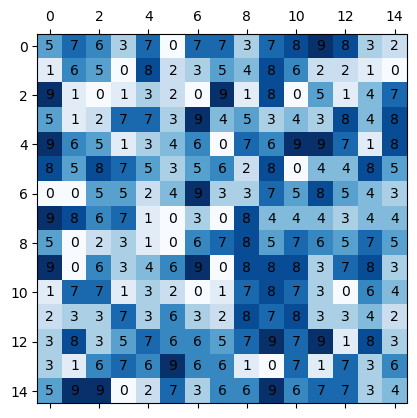

In [57]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(15):
    for j in range(15):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

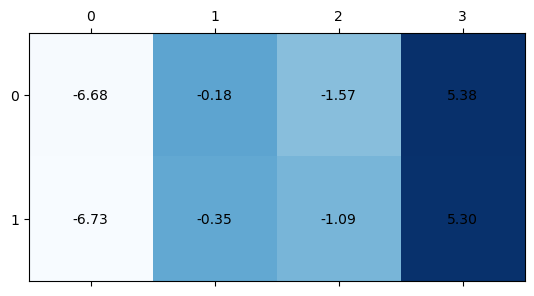

In [58]:
fig, ax = plt.subplots()

ax.matshow(nn.weights1, cmap=plt.cm.Blues)

float_formatter = "{:.2f}".format
for i in range(nn.weights1.shape[1]):
    for j in range(nn.weights1.shape[0]):
        c = nn.weights1[j,i]
        ax.text(i, j, str(float_formatter(c)), va='center', ha='center')

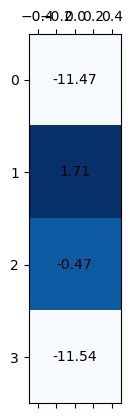

In [59]:
fig, ax = plt.subplots()

ax.matshow(nn.weights2, cmap=plt.cm.Blues)

float_formatter = "{:.2f}".format
for i in range(nn.weights2.shape[0]):
    c = nn.weights2[i,0]
    ax.text(0, i, str(float_formatter(c)), va='center', ha='center')

In [51]:
import numpy as np
from sklearn import metrics
from sklearn.mixture import GMM

# X is a 1000 x 2 array (1000 samples of 2 coordinates).
# It is actually a 2 dimensional PCA projection of data
# extracted from the MNIST dataset, but this random array
# is equivalent as far as the code is concerned.
X = np.random.rand(1000, 2)

clusterer = GMM(3, 'diag')
clusterer.fit(X)
cluster_labels = clusterer.predict(X)

# Now I can count the labels for each cluster..
count0 = list(cluster_labels).count(0)
count1 = list(cluster_labels).count(1)
count2 = list(cluster_labels).count(2)


def purity_score(y_true, y_pred):
    """Purity score
        Args:
            y_true(np.ndarray): n*1 matrix Ground truth labels
            y_pred(np.ndarray): n*1 matrix Predicted clusters

        Returns:
            float: Purity score
    """
    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bins
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner

    return accuracy_score(y_true, y_voted_labels)

ImportError: cannot import name 'GMM' from 'sklearn.mixture' (D:\Anaconda\lib\site-packages\sklearn\mixture\__init__.py)

In [55]:
# https://goldinlocks.github.io/Information-Gain/
# calculate the entropy for a dataset
from math import log2

# proportion of examples in each class
class0 = 10/100
class1 = 90/100

# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1))

# print the result
print(f'Entropy: {round(entropy,3)} bits')

# calculate the entropy for the split in the dataset
def entropy(class0, class1):
    return -(class0 * log2(class0) + class1 * log2(class1))

# split of the main dataset
class0 = 13 / 20
class1 = 7 / 20

# calculate entropy before the change
s_entropy = entropy(class0, class1)
print('Dataset Entropy: %.3f bits' % s_entropy)

# split 1 (split via value1)
s1_class0 = 7 / 8
s1_class1 = 1 / 8

# calculate the entropy of the first group
s1_entropy = entropy(s1_class0, s1_class1)
print('Group1 Entropy: %.3f bits' % s1_entropy)

# split 2  (split via value2)
s2_class0 = 6 / 12
s2_class1 = 6 / 12

# calculate the entropy of the second group
s2_entropy = entropy(s2_class0, s2_class1)
print('Group2 Entropy: %.3f bits' % s2_entropy)

# Lastly, we can calculate the information gain for this variable based on the groups created for each value of the variable and the calculated entropy.
# The first variable resulted in a group of 8 examples from the dataset, and the second group had the remaining 12 samples in the data set.
# Therefore, we have everything we need to calculate the information gain.
# In this case, information gain can be calculated as:
# Entropy(Dataset) – Count(Group1) / Count(Dataset) * Entropy(Group1) + Count(Group2) / Count(Dataset) * Entropy(Group2)
#
# Entropy(13/20, 7/20) – 8/20 * Entropy(7/8, 1/8) + 12/20 * Entropy(6/12, 6/12)

# calculate the information gain
gain = s_entropy - (8/20 * s1_entropy + 12/20 * s2_entropy)
print('Information Gain: %.3f bits' % gain)

Entropy: 0.469 bits
Dataset Entropy: 0.934 bits
Group1 Entropy: 0.544 bits
Group2 Entropy: 1.000 bits
Information Gain: 0.117 bits


In [77]:
# implement max gain split
import matplotlib.pyplot as plt

# Entropy is a measurement of the disorder or impurity of a set of occurrences.
# It determines the usual amount of information needed to classify a sample taken from the collection.
def entropy(class0, class1):
    return -(class0 * log2(class0) + class1 * log2(class1))

# Information gain is a metric for the entropy reduction brought about by segmenting a set of instances according to a feature.
# It gauges the amount of knowledge a characteristic imparts to the class of an example.
def infogain0(class0, class1, s1_class0, s1_class1, s2_class0, s2_class1, count_g1, count_g2):
    countdataset = count_g1 + count_g2
    return entropy(class0, class1) - (count_g1/countdataset * entropy(s1_class0, s1_class1) + count_g2/countdataset * entropy(s2_class0, s2_class1))
    
# In decision trees, entropy is typically taken into account for determining the best split, 
# while information gain is frequently employed as a criterion for choosing the optimal feature to split on.
# Information Gain = Entropy(Parent) − Weighted Average Entropy(Children)
def infogain(splitorigc0, splitorigc1, countgroup0, splitnew0, splitnew1):
    countdataset = splitorigc0 + splitorigc1
    res = entropy(splitorigc0/countdataset, splitorigc1/countdataset)
    res -= countgroup0/countdataset * entropy(splitnew0/countgroup0, (countgroup0-splitnew0)/countgroup0)
    res -= (countdataset-countgroup0)/countdataset * entropy(splitnew1/(countdataset-countgroup0), (countdataset-countgroup0-splitnew1)/(countdataset-countgroup0))
    return res
    
infogain0(13 / 20, 7 / 20, 7 / 8, 1 / 8, 6 / 12, 6 / 12, 8/20, 12/20), infogain(13, 7, 8, 7, 6)

#plt.plot([infogain((20-s) / 20, s / 20, 7 / 8, 1 / 8, 6 / 12, 6 / 12, 8/20, 12/20) for s in range(1,19)])
#plt.show()

(0.11664227809565242, 0.11664227809565242)

In [76]:
import math

def divisorGenerator(n):
    large_divisors = []
    for i in range(1, int(math.sqrt(n) + 1)):
        if n % i == 0:
            yield i
            if i*i != n:
                large_divisors.append(n / i)
    for divisor in reversed(large_divisors):
        yield divisor

print(list(divisorGenerator(3193)))

[1, 31, 103.0, 3193.0]


In [87]:
# original dataset split: 10 yes, 12 no
# new criterion: A: 10, B: 8, C: 3
# original criterion by new criterion: A 6 yes 4 no, B 6 yes 2 no, C 0 yes 3 no 

def infogain(splitorig, splitnew):
    '''splitorig = list of size of subsets, splitnew = list of lists with new splits'''
    countdataset = sum(splitorig)
    parententropy = sum([-s/countdataset * log2(s/countdataset) for s in splitorig])
    newgroupcounts = [sum(s) for s in splitnew]
    newgroupentropies = [sum([-sel/newgroupcounts[idx] * log2(sel/newgroupcounts[idx]) for sel in s if sel > 0]) for idx, s in enumerate(splitnew)]
    return parententropy - sum([newgroupcounts[idx]*ne/countdataset for idx, ne in enumerate(newgroupentropies)])


#infogain([13, 7], [[7, 1], [6, 6]])
infogain([10, 11], [[6, 4], [6, 2], [0, 3]])



0.22694791353572985